In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
file_list = os.listdir(r"C:\\Users\\gemst\\OneDrive\\Desktop\\GDA_Capstone\\data")
print(file_list)

['202307-divvy-tripdata.csv', '202308-divvy-tripdata.csv', '202309-divvy-tripdata.csv', '202310-divvy-tripdata.csv', '202311-divvy-tripdata.csv', '202312-divvy-tripdata.csv', '202401-divvy-tripdata.csv', '202402-divvy-tripdata.csv', '202403-divvy-tripdata.csv', '202404-divvy-tripdata.csv', '202405-divvy-tripdata.csv', '202406-divvy-tripdata.csv']


In [3]:
raw_file = pd.read_csv("data/202307-divvy-tripdata.csv")
base_dataframe = pd.DataFrame(raw_file)
base_dataframe.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,day_of_week
0,9340B064F0AEE130,electric_bike,2023-07-23 20:06,2023-07-23 20:22,Kedzie Ave & 110th St,20204,Public Rack - Racine Ave & 109th Pl,877,41.692406,-87.700905,41.694835,-87.653041,member,0:16:30,1
1,D1460EE3CE0D8AF8,classic_bike,2023-07-23 17:05,2023-07-23 17:18,Western Ave & Walton St,KA1504000103,Milwaukee Ave & Grand Ave,13033,41.898418,-87.686596,41.891578,-87.648384,member,0:13:30,1
2,DF41BE31B895A25E,classic_bike,2023-07-23 10:14,2023-07-23 10:24,Western Ave & Walton St,KA1504000103,Damen Ave & Pierce Ave,TA1305000041,41.898418,-87.686596,41.909396,-87.677692,member,0:09:36,1
3,9624A293749EF703,electric_bike,2023-07-21 8:27,2023-07-21 8:32,Racine Ave & Randolph St,13155,Clinton St & Madison St,TA1305000032,41.884112,-87.656943,41.882752,-87.641190,member,0:04:56,6
4,2F68A6A4CDB4C99A,classic_bike,2023-07-08 15:46,2023-07-08 15:58,Clark St & Leland Ave,TA1309000014,Montrose Harbor,TA1308000012,41.967088,-87.667291,41.963982,-87.638181,member,0:11:26,7


In [4]:
# check for percentage of blank cells in each column of the dataframe 
base_dataframe.isna().sum()/base_dataframe.shape[0]

ride_id               0.000000
rideable_type         0.000000
started_at            0.000000
ended_at              0.000000
start_station_name    0.160155
start_station_id      0.160155
end_station_name      0.169744
end_station_id        0.169744
start_lat             0.000000
start_lng             0.000000
end_lat               0.000000
end_lng               0.000000
member_casual         0.000000
ride_length           0.000000
day_of_week           0.000000
dtype: float64

In [5]:
# removing rides with blank data
cleaned_data = base_dataframe.dropna()
# number of rows and columns of cleaned data
cleaned_data.shape

(574023, 15)

In [6]:
# dropping rows with the same start and end times
def get_matching_rows_indexes(df, col1, col2):
    """
    Get a list of indexes of rows where the values in col1 and col2 are the same.

    Parameters:
    df (pd.DataFrame): The DataFrame to check.
    col1 (str): The name of the first column.
    col2 (str): The name of the second column.

    Returns:
    list: A list of row indexes where the values in col1 and col2 are the same.
    """
    matching_indexes = df.index[df[col1] == df[col2]].tolist()
    return matching_indexes

rides_with_the_same_start_and_end_time = get_matching_rows_indexes(cleaned_data, "started_at", "ended_at")
cleaned_data = cleaned_data.drop(rides_with_the_same_start_and_end_time)


<Axes: >

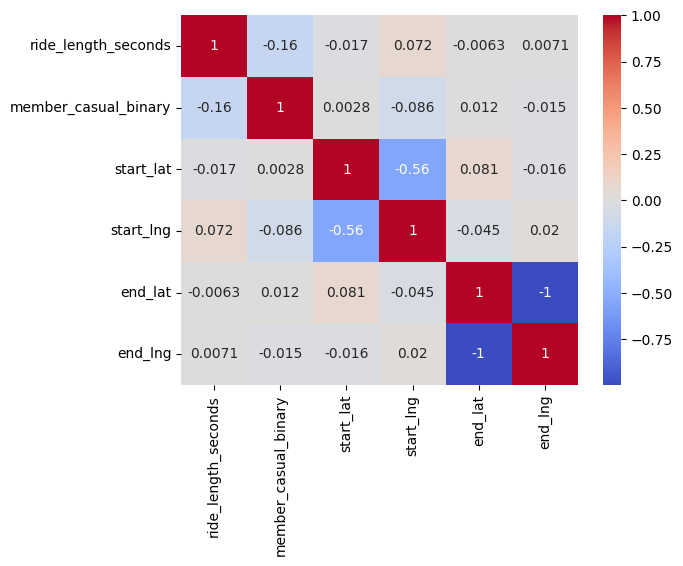

In [13]:
def get_seconds(time_str):
    """Get seconds from hh:mm:ss formatted time."""
    h, m, s = list(map(int, time_str.split(":")))
    return h * 3600 + m * 60 + s

# converting the hh:mm:ss format of time into seconds
cleaned_data["ride_length_seconds"] = cleaned_data["ride_length"].apply(get_seconds)

# converting member_casual to 1/0
cleaned_data["member_casual"] = cleaned_data["member_casual"].astype("category")
cleaned_data["member_casual_binary"] = cleaned_data["member_casual"].cat.codes

# correlation matrix
sns.heatmap(cleaned_data[["ride_length_seconds", "member_casual_binary", "start_lat", "start_lng", "end_lat", "end_lng"]].corr(), 
            annot=True, cmap="coolwarm")

# exporting the cleaned data to csv format
# cleaned_data.to_csv("cleaned_data/clean-202307-divvy-tripdata.csv", index=False)

In [8]:
cleaned_data[["day_of_week", "ride_length_seconds", "member_casual_binary"]]

,day_of_week,ride_length_seconds,member_casual_binary
0,1,990,1
1,1,810,1
2,1,576,1
3,6,296,1
4,7,686,1
...,...,...,...
766803,6,1742,0
767142,7,362,0
767338,6,6856,0
767535,4,771,1
